# Dimensionality Reduction

## Introduction

Many Machine Learning problems involve thousands or even millions of features for each training instance. Not only does this make training extremely slow, it can also make it much harder to find a good solution, as we will see. This problem is often refer to as the _curse of dimensionality_.

Fortunately, in real-world problems, it is often possible to reduce the number of features considerably, turning an intractable problem into a tractable one. For instance some of the data points may be completely meaningless, and play no role in helping us explain our target variable. Moreover, sometimes two neigbouring data points may often be highly correlated, that if you merge them into a single data point, you will not lose much information.

By reducing the dimensions of our data set, we can increase the speed of our training, and reduce our data set down to two or three dimension making it possible to plot a high-dimensional training set on a graph and gain some important insight by visually detecting patterns, such as clusters.

* In this notebook, we will discuss _the curse of dimensionality_ and get a sense of what goes on in high-dimensional space. Then, we will present the two primary approaches to dimensionality reduction (projection and Manifold Learning), and we will go through three of the most popular dimensonality reduction techniques: PCA, Kernel_ PCA, LLE_

## The Curse of Dimensionality

We are so used to living in three dimensions that our intuition fails us when we try to imagine a high-dimensional space. Even a basic 4D hypercube is incredibly hard to picture in our mind.

![test](https://static.interestingengineering.com/images/import/2017/05/Dimension_levels.jpg)

It turns out that many things behave very differently in high- dimensional space. For example, if you pick a random point in a unit space (a 1 x 1 square), it will have only about a 0.4% chance of being located less than 0.001 from the border (in other words, it is very unlikely that a random point will be "extreme along any dimension"). But in a 10,000-dimensional unit hypercube (a 1 x 1 x ... x 1 cube, with ten thousand 1s), this probability is greater than 99.99999%. Most points in a high-dimensional hypercube are very close to the border.

Here is a more troublesome difference: if you pick two points randomly in a unit square, the distance between these two points will be on average, roughly 0.52. If you pick two random points in a unit 3D cube, the average distance will be roughly 0.66. But what about two points picked randomly in a 1,000,000-dimensional hypercube? Well, the average distance, believe it or not, will be about 408.25 (roughly $\sqrt{1,000,000/6}$)! This is quite counterintuitive: how can two points be so far apart when they both lie within the same unit hypercube? This fact implies that high-dimensional datasets are at risk of being very sparse: most  training stances are likely to be far away from each other. Of course, this means that a new instance will likely be far away from any training instance, making predictions much less reliable than in lower dimensions, since they will be based on much larger extrapolations. 
* In short, the more dimensions the training set has, the greater the risk of overfitting it.

In theory, one solution to the curse of dimensionality could be to increase the size of the training set to reach a sufficient density of training instances.However, in practice, the number of training instances required to reach a given density grows exponentially with the number of dimensions. With just 100 features, you would need more instances than atoms in the observable universe in order for training instances to be within 0.1 of each other on average, assuming that they were spread out uniformly across all dimensions.

___

## Approaches to Dimensionality Reduction

Before we dive into specific dimensionality reduction algorithms, let's take a look at the two main approaches to reducing dimensionality: projection and Manifold Learning.

## Projection

In most real-world problems, training instances are _not_ spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated. As a result, all training instances actually lie within (or close to) a much lower-dimensional subspace of the high-dimensional space. This sounds very abstract, so let's look at an example.

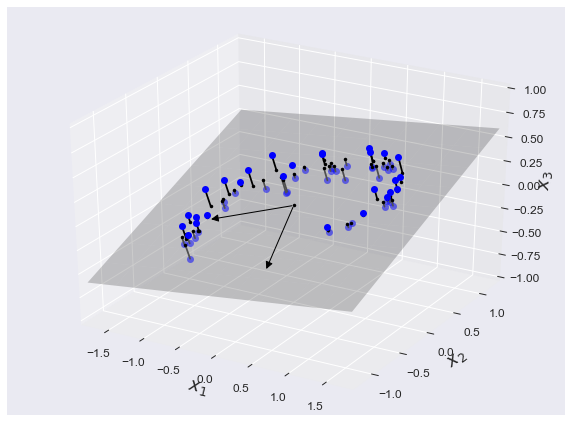

In [37]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7.5))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:, 2] > X3D_inv[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
np.linalg.norm(C, axis=0)
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], [0], "k.")

for i in range(m):
    if X[i, 2] > X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-", color="#505050")
    
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

#save_fig("dataset_3d_plot")
plt.show()

Notice that all training instances lie close to a plane: this is a lower-dimensional (2D) subspace of the high-dimensional (3D) space. Now if we project every training instance perpendicularly onto this subspace (as represented by the short lines connecting the instances to the plane), we get the new 2D dataset. Ta-da!, We have just reduced the dataset's dimensionality from a 3D to 2D. 

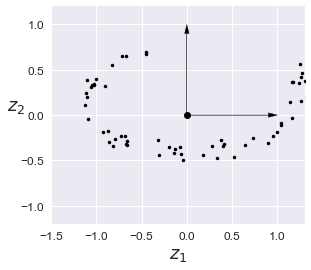

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)

Note that the axes correspond to new features $z_1$ and $z_2$ (the coordinates of the projections on the plane).

However, projection is not always the best approach to dimensionality reduction. In many cases the subspace may twist and turn, such as the famous _Swiss roll_ toy data set represented below

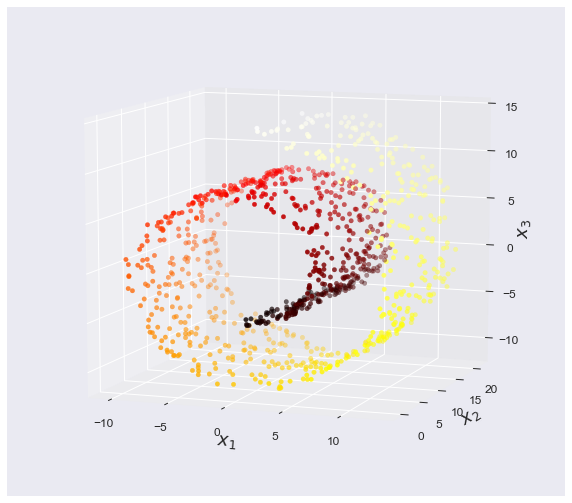

In [44]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

Simply projecting onto a place (e.g., by dropping $x_3$) would squash different layers of the Swiss roll together as shown on the left. However, what you really want is to unroll the Swiss roll to obtain the 2D dataset on the right.

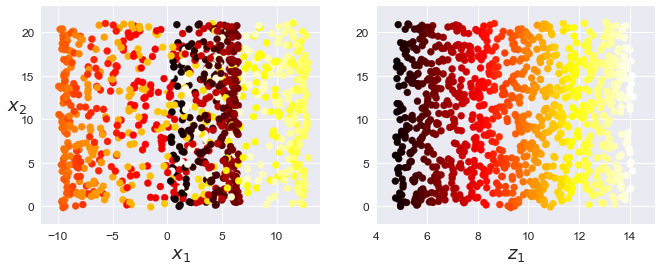

In [47]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

#save_fig("squished_swiss_roll_plot")
plt.show()

## Manifold Learning

The Swiss roll is an example of a 2D _manifold_. Put simply, a 2D manifold is a 2D shape that can be bent and twisted in a higher-dimensional space. More generally, a $d$-dimensional manifold is a part of an $n$-dimensional space (where $d < n$) that locally resembles a $d$-dimensional hyperplane. In the case of the Swiss roll, $d$ = 2 and $n$ = 3: it locally resembles a 2D plane, but it is rolled in the third dimension.

Many dimensionality reduction algoirthms work by modeling the _manifold_ on which the training instances lie; this is called _Manifold Learning_. It relies on the _manifold assumption_, also called the _manifold hypothesis_, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold. This assumption is very often empirically observed.

The manifold assumption is often accompanied by another implicit assumption: that the task at hand (e.g. classification or regression) will be simpler if expressed in the lower-dimensional space of the manifold. For example, in  the figure below, the Swiss roll is split into two classes: in the 3D space (1st figure), the decision boundary would be fairly complex, but in the 2D unrolled manifold space (2nd figure), the decision boundary is a simple straight line. 

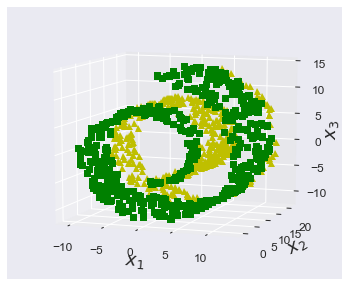

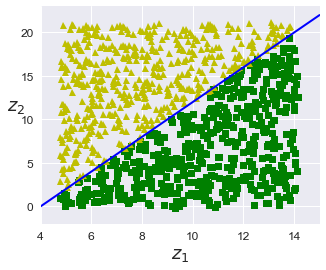

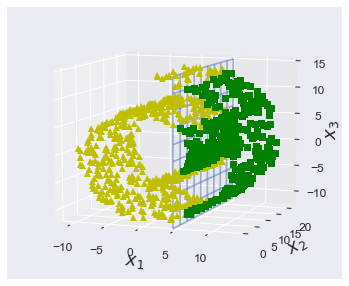

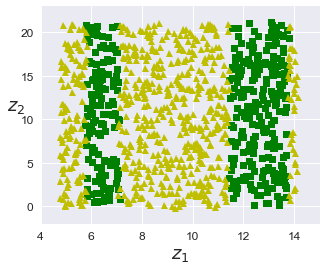

In [49]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)



fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

However, this assumption does not always hold. For example, in the 3rd figure where the decision boundary is located at $x_1 = 5 $. This decision boundary looks very simple in the original 3D space (a vertical plane), but it looks more complex in the unrolled manifold (a collection of four independent line segments).

* In short, if you redice the dimensionality of your training set before training a model, it will definitely speed up training, but it may not always lead to a better or simplier solution; it all depends on the dataset.

Hopefully, you now have a good sense of what the curse of dimensionality is and how dimensionality reduction algorithms can fight it, especially when the manifold assumption holds. Now we will discuss the popular dimensionalty reduction techniques.

# Principal Component Analysis

_Principle Component Analysis_ (PCA) is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, then it projects the data onto it.

## Preserving the Variance

Before you can project the training set onto a lower-dimensional hyperplane, you first need to choose the right hyperplane. For instance, a simple 2D dataset is represented on the left along three different axes (ie.e one-dimensional hyperplanes). On the right is the result of the projection of the dataset onto each of these axes. As you can see, the projection onto the solid lines preserve the maximum variance, while the projection onto the dotted line preserves very little variance, and the projection onto the dashed lines preseve an intermediate amount of variance.

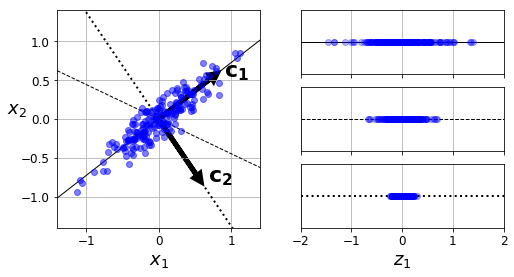

In [3]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

It seems reasonable to select the axis that preserves the maximum amount of variance, as it will most likely lose less information than other projections. Another way to justify this choice is that it is the axis that minimizes the mean squared distance between the original dataset and its projection onto that axis. This is Principle Component Analysis

## Principal Components

PCA identifies the axis that accounts for the largest amount of variance in the training set. In figure above, that axis was a solid line. It also finds a second athis, orthogonal to the first one, that accounts for the largest amount of remaining variance. In this 2d example, there would be no other choice, than the dotted lines. if it were a higher-dimensional data-set, PCA would aso find a third axis, orthogonal to both previous axes and a fourth and fifth, and so on - as mant axes as the number of dimensions in the dataset.

The unit vector that defines the $i^{th}$ axis is called the  $i^{th}$ _principle component_ (PC). As shown in the figure above, the $1^{st}$ PC is $c_1$ and the $2^{nd}$ PC is $c_2$.

So how can you find a principle component of a training set? Luckily, there is a standard matrix factorization technique called _Singular Value Decomposition (SVD)_ that can decompose the training set matrix $X$ into the dot product of three matrices $U \dot \sigma \dot V^T$ where $V^T$ contains all the principal components that we are looking for.

* note Pca assumes that the dataset is centrered around the origin. As we will see, Scikit-Learn's PCA classes take care of centering the data for you. However,if you implement PCA yourself, or use other libraries,don't forget to center the data first

## Projecting Down to d Dimensions

Once you have identified all the principal componenents, you can reduce the dimensionality of the dataset down to $d$ dimensions by projecting it onto the hyperplane defined by thefirst principal components. Selecting this hyperplane ensures that the projections will preserve as much variance as possible.For example,in figure 8-2 the 3D dataset is projected down to the 2D plane defined by the first two principal components,preserving a large part of the dataset's variance. As a result the 2d projection looks very much like the original dataset.

To project the training set onto the hyperplane, you can simply compute the dot product of the training set matrix $X$ by the matrix $W_d$, defined as the matrix containing the first $d$ principal components.

## Scikit-learn

Scikit-Learn's PCA class implements PCA using SVD just like we did before. The following code applies PCA to reduce the dimensoinality of the dataset down to two dimensions (note that it automatically takes care of centering the data)

```Python
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_tranform(X)

```

After fitting the PCA transformer to the dataset, you can access the principal components using the componenets_ variable(note that it contains the PCs as horizontal vectors, for example, the first principal component is equal to pca.components_.T[:,0])

## Explained Variance Ratio

Another very useful piece of information is the _explained variance ratio_ of each principal component, available via the _explained_variance_ratio_ variable. It indicates the proportion of the dataset's variance that lies along the axis of each principal component. For example, let's take a look at the explained variance ratios of the first two components of the 3D dataset represented in Figure 8-2. 

```Python
pca.explained_variance_ratio
array([0.84, 0.14])
```

This tells us that 84.2% of the dataset's variance lies along the first axis, and 14.6% lies along the second axis. This leaves less than 1.2% of the first axis, so it is reasonable to assume that it probably carries little information.

## Choosing the Right Number of Dimensions

Instead of arbitrarily choosing the number of dimensions to reduce down to, it is generally perferable to choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%). Unless of course, you are reducing dimensionality for data visualization - in that case you will generally want to reduce the dimensionality down to 2 or 3. 

The following code computes PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 95% of the training set's variance.

```Python
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum +=0.95) + 1  

```

You could then set n_components = d and run PCA again. However, there is a much better option: instead of specifying the number of principal components you want to preserve, you can set *n_components* to be a float between 0.0and 1.0, indicating the ratio of variance you wish to preserve:

```Python
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)

```

In [ ]:
# Standard Libaries
import pandas as pd
import numpy as np


# Deep Learning
import tensorflow as tf

# Machine Learning
from sklearn.cross_validation import train_test_split
from sklearn import datasets
from sklearn.decomposition import PCA

# Plotting tools
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




In [2]:
df = pd.read_csv('./data/iris.csv',names = ['sepal_l','sepal_w','petal_l','petal_w','target'],index_col=False)

In [3]:
df.head()

,sepal_l,sepal_w,petal_l,petal_w,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [122]:
x = df.drop('target',axis = 1)
y = df['target']

In [123]:
model = PCA(n_components=2)
model.fit(x)
X_2D = model.transform(x)

In [124]:
df2 = pd.DataFrame(X_2D,columns = ['PCA1','PCA2'])

In [125]:
df3 = pd.concat([df,df2], axis=1, join_axes=[df.index])

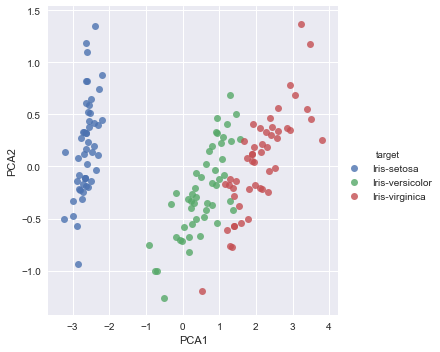

In [126]:
g = sns.lmplot(x="PCA1", y="PCA2",hue = 'target',  data=df3, fit_reg=False)

In [127]:
df2

,PCA1,PCA2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
5,-2.279897,0.747783
6,-2.820891,-0.082105
7,-2.626482,0.170405
8,-2.887959,-0.570798
9,-2.673845,-0.106692


In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [13]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [14]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [15]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [16]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [17]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [18]:
X2D_using_svd = X2D

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [20]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [21]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [22]:
np.allclose(X2D, -X2D_using_svd)

True

In [23]:
X3D_inv = pca.inverse_transform(X2D)

In [24]:
np.allclose(X3D_inv, X)

False

In [25]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.010170337792848549

In [26]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

In [27]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

In [28]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [29]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

In [30]:
pca.explained_variance_ratio_

array([ 0.84248607,  0.14631839])

In [31]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

In [32]:
np.square(s) / np.square(s).sum()

array([ 0.84248607,  0.14631839,  0.01119554])

In [33]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [34]:
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

In [41]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)